In [3]:
#%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("..\Transform_movimientos\Movimiento_Distrito.csv")

In [6]:
df.head()

,Código,Departamento,Provincia,Distrito,Aún no había nacido,"Sí, vivía hace 5 años en este distrito",No vivía hace 5 años en este distrito
0,10101,Amazonas,Chachapoyas,Chachapoyas,2633,22774,7182
1,10102,Amazonas,Chachapoyas,Asunción,22,220,20
2,10103,Amazonas,Chachapoyas,Balsas,111,938,87
3,10104,Amazonas,Chachapoyas,Cheto,44,533,65
4,10105,Amazonas,Chachapoyas,Chiliquin,49,483,53


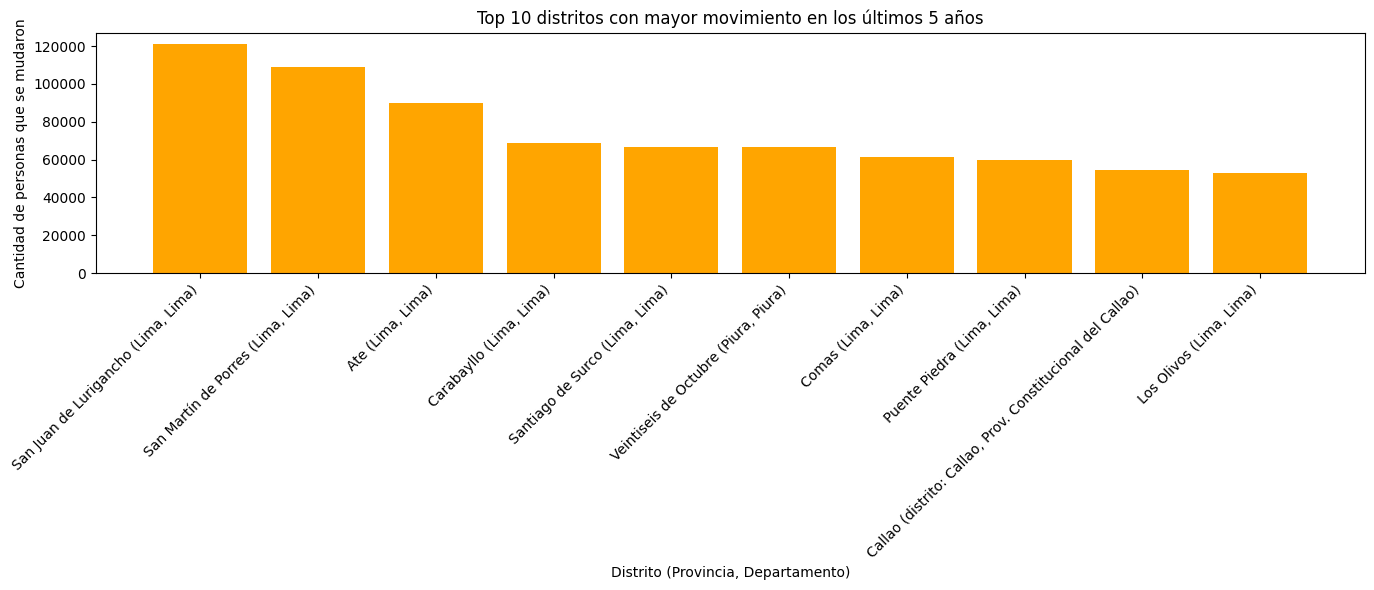

In [9]:
# Calcular la cantidad de personas que se mudaron a cada distrito
df['Movimiento'] = df['No vivía hace 5 años en este distrito']

# Crear una etiqueta combinada con distrito, provincia y departamento
df['Etiqueta'] = df['Distrito'] + ' (' + df['Provincia'] + ', ' + df['Departamento'] + ')'

# Obtener los 10 distritos con mayor movimiento
top10_mov = df.nlargest(10, 'Movimiento')

# Gráfico
plt.figure(figsize=(14, 6))
plt.bar(top10_mov['Etiqueta'], top10_mov['Movimiento'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 distritos con mayor movimiento en los últimos 5 años')
plt.xlabel('Distrito (Provincia, Departamento)')
plt.ylabel('Cantidad de personas que se mudaron')
plt.tight_layout()
plt.show()

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_22208\473612937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mov_provincia.values, y=mov_provincia.index, palette="YlOrRd")


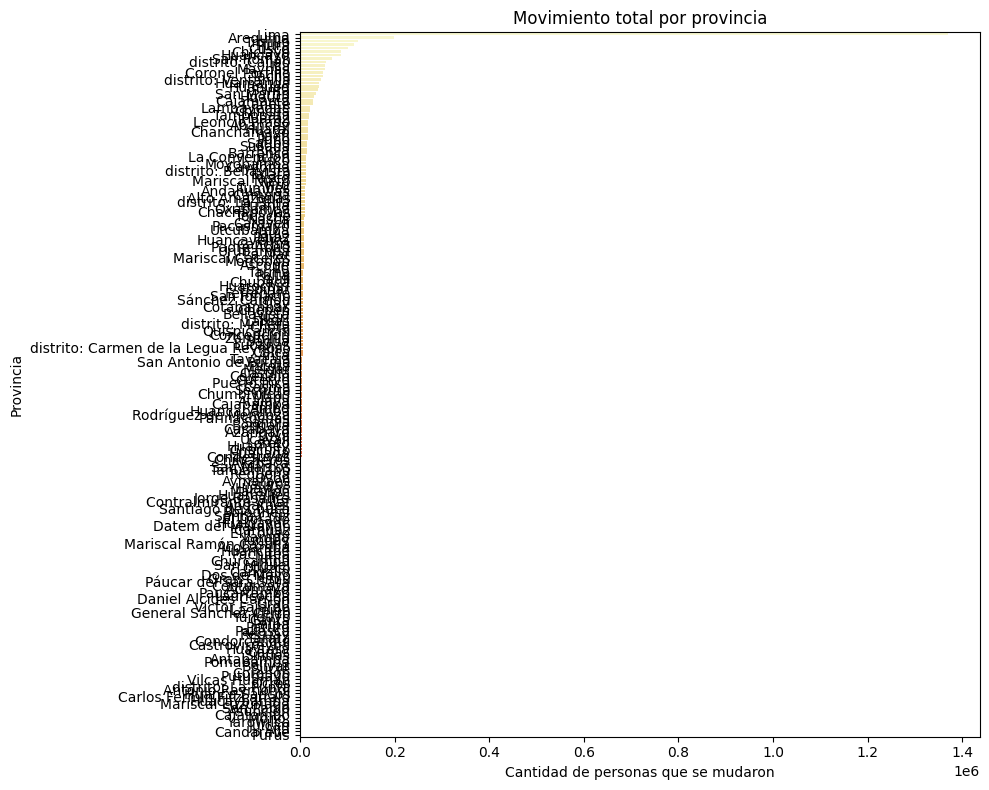

In [10]:
import seaborn as sns

# Sumar movimientos por provincia
mov_provincia = df.groupby('Provincia')['Movimiento'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=mov_provincia.values, y=mov_provincia.index, palette="YlOrRd")
plt.title('Movimiento total por provincia')
plt.xlabel('Cantidad de personas que se mudaron')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()


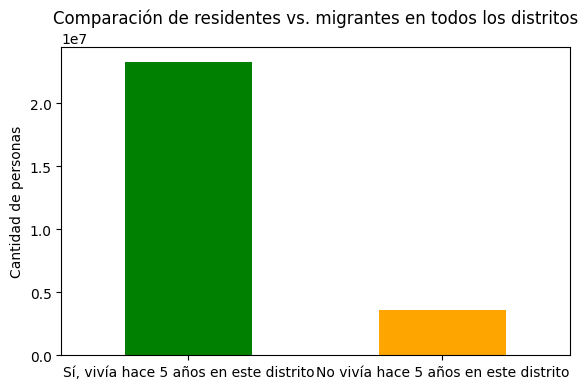

In [11]:
# Sumar datos
totales = df[['Sí, vivía hace 5 años en este distrito', 'No vivía hace 5 años en este distrito']].sum()

# Gráfico
plt.figure(figsize=(6,4))
totales.plot(kind='bar', color=['green', 'orange'])
plt.title('Comparación de residentes vs. migrantes en todos los distritos')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


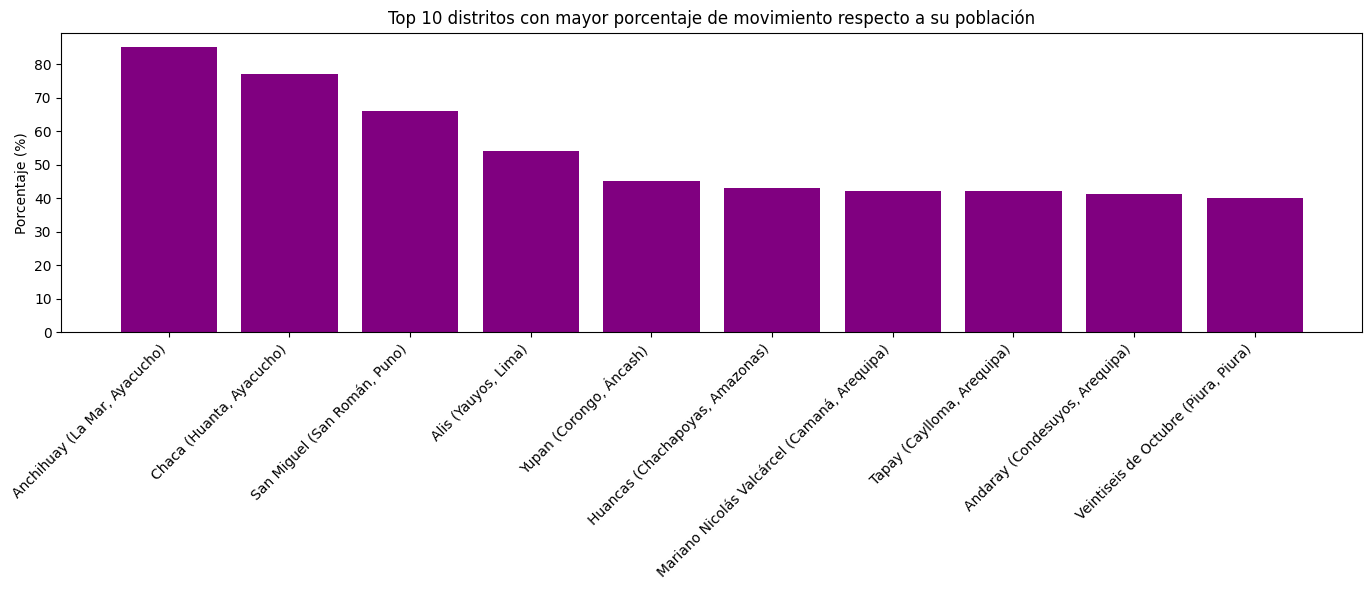

In [13]:
# Crear columna de porcentaje de movimiento
df['Porcentaje Movimiento'] = df['Movimiento'] / (df[['Aún no había nacido', 'Sí, vivía hace 5 años en este distrito', 'Movimiento']].sum(axis=1)) * 100

# Top 10 distritos con mayor % de movimiento
top10_pct = df.nlargest(10, 'Porcentaje Movimiento')

# Gráfico
plt.figure(figsize=(14, 6))
plt.bar(top10_pct['Etiqueta'], top10_pct['Porcentaje Movimiento'], color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 distritos con mayor porcentaje de movimiento respecto a su población')
plt.ylabel('Porcentaje (%)')
plt.tight_layout()
plt.show()


In [ ]:
 
# Cargar datasets
movimiento = pd.read_csv('..Movimiento_Distrito.csv')
ubigeo = pd.read_csv('/mnt/data/Ubigeo.csv')

# Revisar nombres de columnas para saber con qué columna unir
print(movimiento.columns)
print(ubigeo.columns)

# Suponiendo que ambos archivos tienen una columna en común como 'Distrito' o algún código similar:
# (Si no se llaman igual, tienes que renombrar antes de unir)

# Unir los dos datasets
df_final = pd.merge(movimiento, ubigeo, on='Distrito', how='left')

# Verificar resultado
print(df_final.head())
